# Capstone Project - Car Accident Severity

## 1. Introduction / Business Problem

### Stakeholders:
* Seattle Department of Transportation 
* Seattle Police Department - Traffic Enforcement Section
* Car Drivers in Seattle

Car accident is serious problem in Seattle. During the first six months of 2019, 101 people were seriously injured or killed in 98 collisions on Seattle streets, which is the highest number of crashes in the first half of a year since 2010, according to the data provided by the Seattle Department of Transportation (SDOT). The accident victims and their families, the insurance conpanies, health care personal and even the ordinary people, are affected by traffic accidents in many ways. Therefore, predicting the possibility and severity of a car accident based on the weather, road conditions and other factors is important. For drivers, they would drive more carefully or even change their travel if they are able to. For the police and traffic departments, they can put up some warning signs when there is a high traffic accident risk.

## 2. Data

The dataset used in this analysis is provided by SDOT Traffic Management Division, Traffic Records Group. It includes all types of collisions at the intersection or mid-block of a segment recorded by the Traffic Records from 2004 to Present.

The dataset contains 194,673 records with 38 attributes: 16 numerical and 22 categorical (see the figures below for the detailed descriptions). Among these 38 features, 6 of them have a large portion of null value, which are INTKEY, EXCEPTRSNCODE, EXCEPTRSNDESC, INATTENTIONIND, PEDROWNOTGRNT, SPEEDING. We will perform imputation on these feature during the feature engineering step. The target for this prediction task is the "Accident Severity", which are represented by three attributes: SEVERITYCODE, SEVERITYCODE.1, SEVERITYDESC, containing two sets of values: 1, 1, Property Damage Only Collision and 2, 2, Injury Collision. The target is unevenly distributed, with ~70% Property Damage Collisions Only and ~30% Injury Collisions. Therefore, target weights will be applied in the modeling step.

![](SDOT1.png)

![](SDOT2.png)

![](SDOT3.png)

### 2.1 Feature Selection

1. Target: Choose the 'SEVERITYCODE' (A code that corresponds to the severity of the collision: 1-Property Damage; 2-Injury), or 'SEVERITYCODE.1', 'SEVERITYDESC', as the target.
2. Features: Choose features related to the weather, road and drivers' condition.
    * 'INATTENTIONIND': Whether or not collision was due to inattention.
    * 'UNDERINFL': Whether or not a driver involved was under the influence of drugs or alcohol.
    * 'WEATHER': A description of the weather conditions during the time of the collision.
    * 'ROADCOND': The condition of the road during the collision.
    * 'LIGHTCOND': The light conditions during the collision.
    * 'SPEEDING': Whether or not speeding was a factor in the collision.

## 3. Methodology

### 3.1 Exploratory Data Analysis

In [1]:
# import python library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

# load dataset 
df = pd.read_csv('Data-Collisions.csv', low_memory=False)

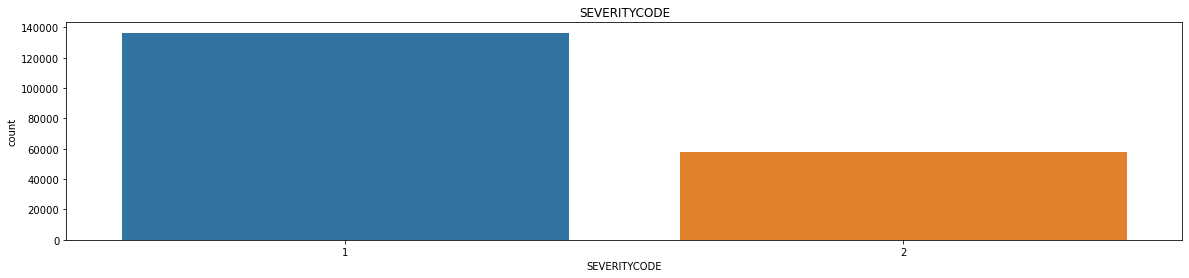

In [2]:
# target distribution
target_feature = 'SEVERITYCODE'

plt.figure(figsize=(20, 4))
sns.countplot(x=target_feature, data=df).set_title(target_feature)
plt.show()

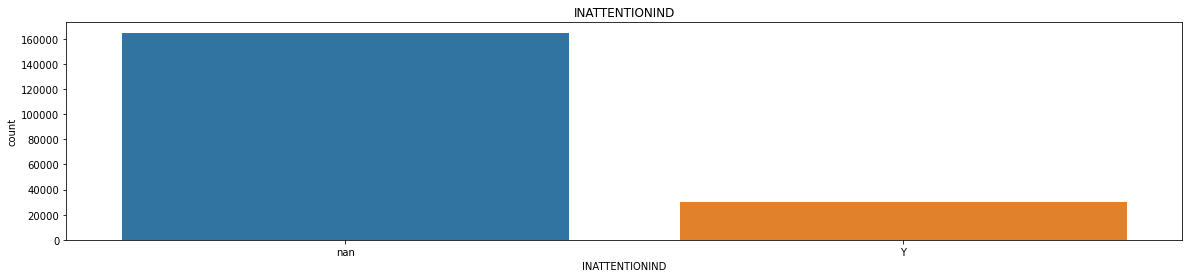

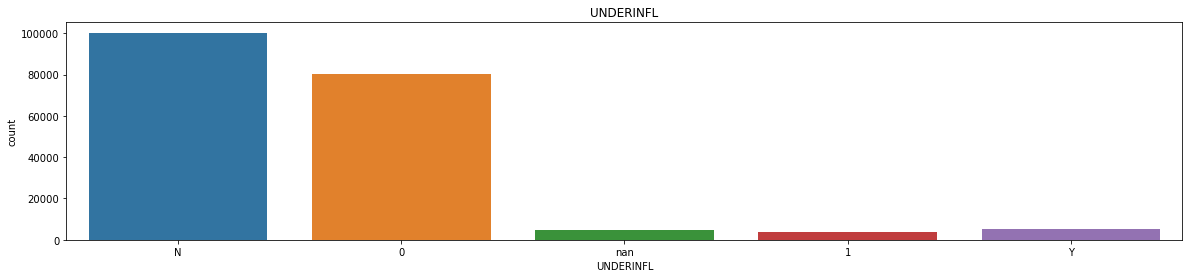

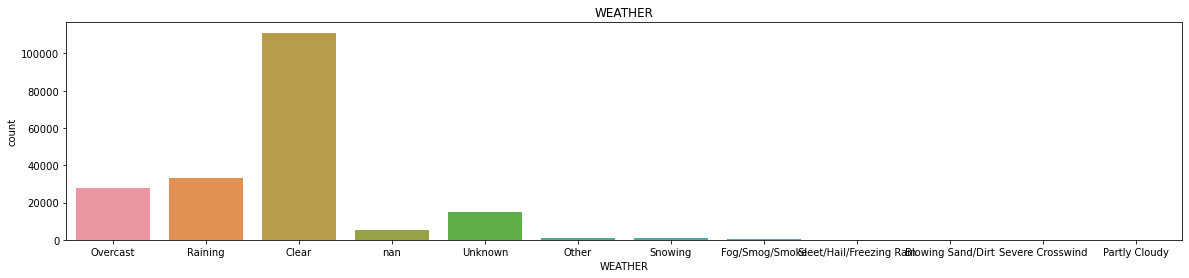

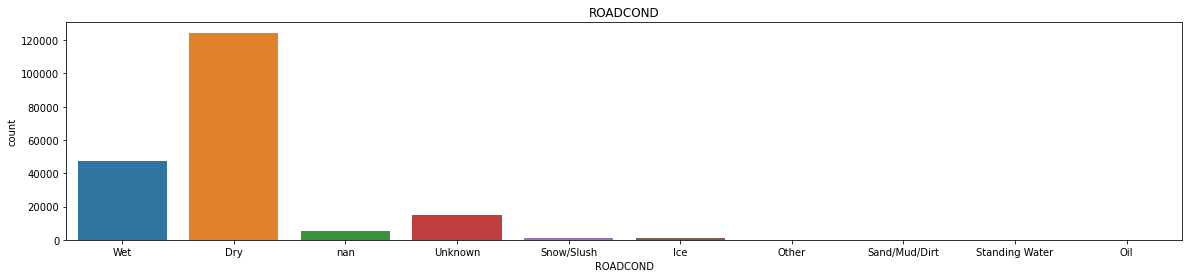

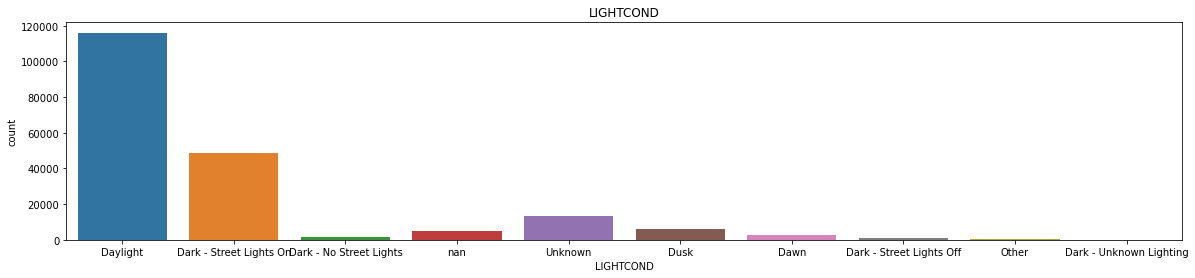

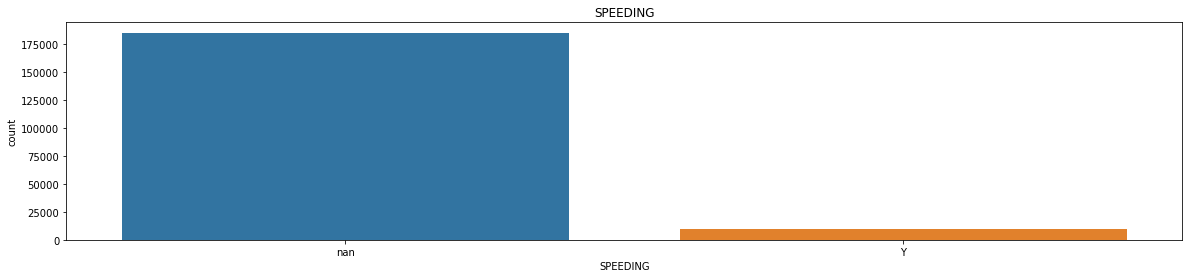

In [3]:
# count distributions
selected_features = ['INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']

for col in selected_features:
    plt.figure(figsize=(20, 4))
    sns.countplot(x=col, data=df.fillna('nan')).set_title(col)
    plt.show()

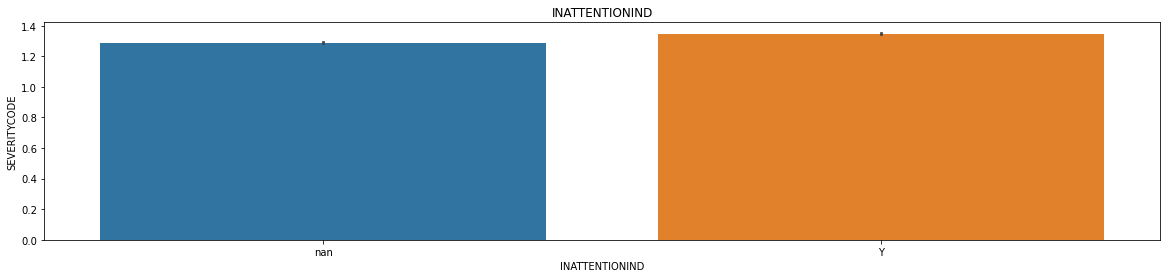

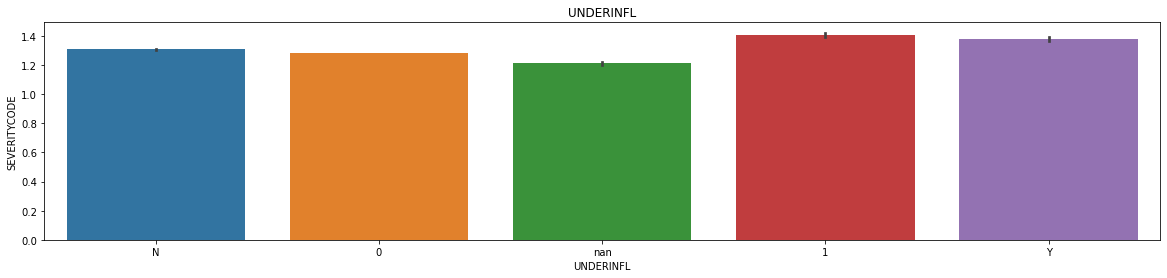

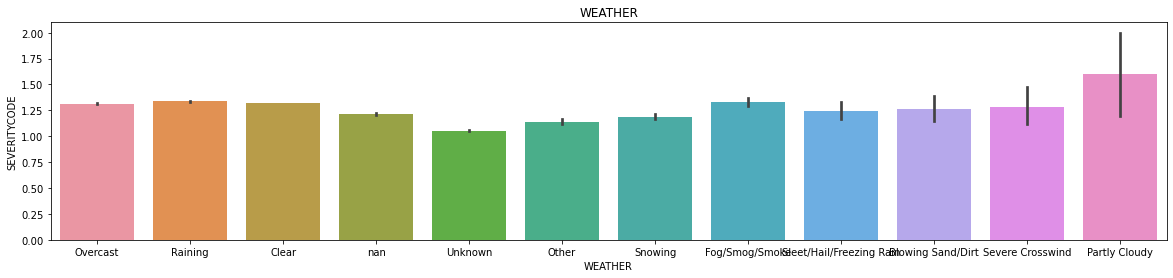

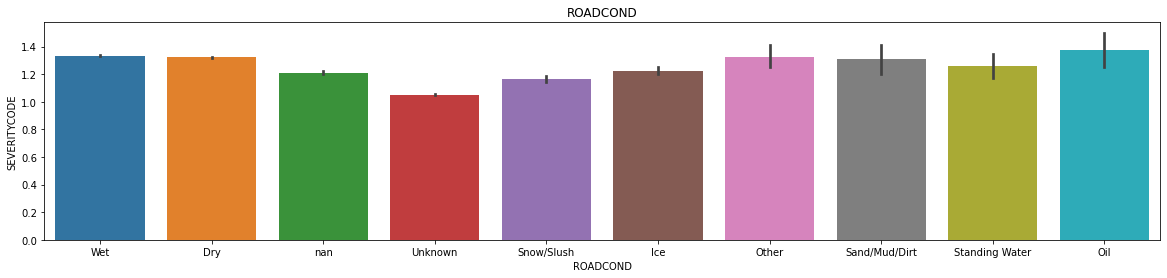

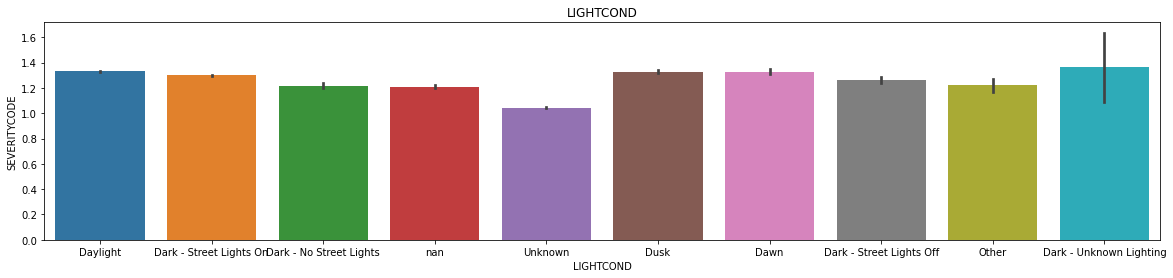

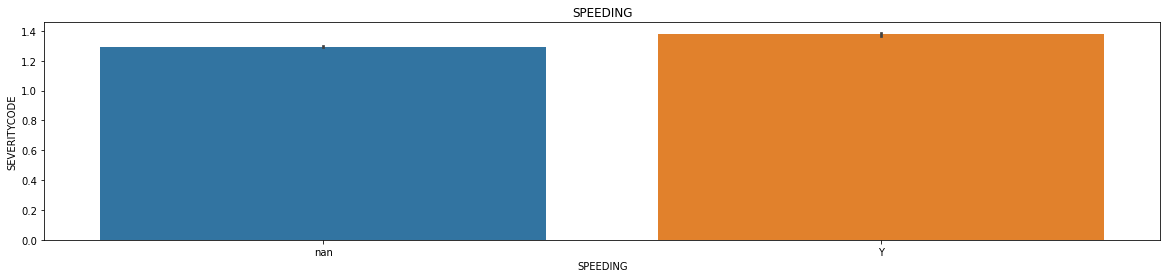

In [4]:
# mean response on target
for col in selected_features:
    plt.figure(figsize=(20, 4))
    sns.barplot(x=col, y=target_feature, data=df.fillna('nan')).set_title(col)
    plt.show()

Insights:
* The target is unevenly distributed, with ~70% Property Damage (1) and ~30% Injury (2).
* Inattention ('INATTENTIONIND'='Y) will increase the collision severity.
* Drivers under the influence of drugs or alcohol ('UNDERINFL'='Y' or '1') will increase the collision severity.
* Speeding ('SPEEDING'='Y') will increase the collision severity.
* Bad weather ('WEATHER'), road ('ROADCOND') and light ('LIGHTCOND') conditions will also slightly increase the collision severity.

### 3.2 Feature Encoding

In [5]:
# select features
df_feature = df[selected_features + [target_feature]].copy()

# binary featurtes
df_feature['SEVERITYCODE'] = df['SEVERITYCODE'].map({1: 0, 2: 1})
df_feature['INATTENTIONIND'] = df['INATTENTIONIND'].map({'Y': 1, np.nan: 0})
df_feature['SPEEDING'] = df['SPEEDING'].map({'Y': 1, np.nan: 0})

# label encoding
df_feature['UNDERINFL'] = df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 2, '1': 2, np.nan: 1})

# one hot encoding
dummy_feature = ['WEATHER', 'ROADCOND', 'LIGHTCOND']
df_feature = pd.concat([df_feature.drop(columns=dummy_feature), pd.get_dummies(df[dummy_feature].fillna('Unknown'))], axis=1)

# show processed dataset
print(f"shape: {df_feature.shape}")
df_feature.head()

shape: (194673, 33)


,INATTENTIONIND,UNDERINFL,SPEEDING,SEVERITYCODE,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


### 3.3 Feature Correlation Analysis

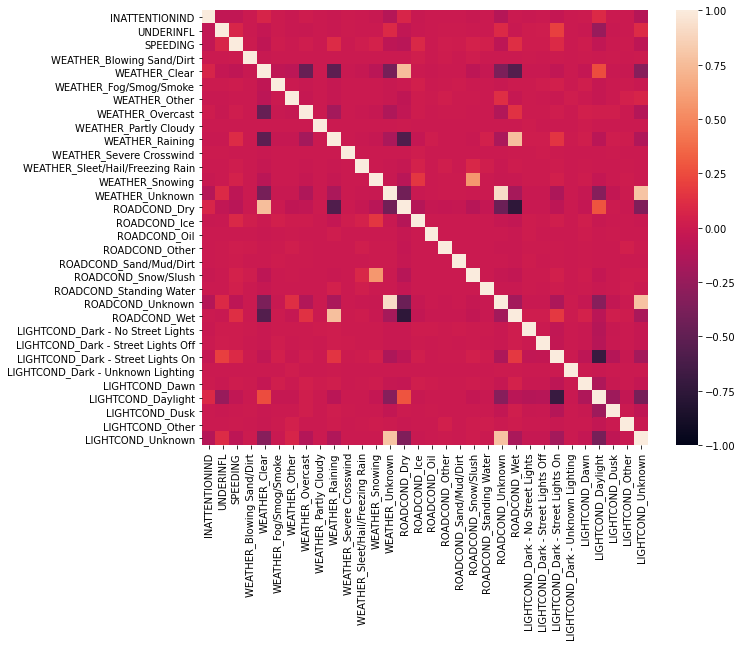

In [217]:
# plot heatmap for feature correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_feature.drop(columns=target_feature).corr(), vmin=-1, vmax=+1)
plt.show()

High correlation observed between weather, road and light conditions, which is reasonable since the road and light conditions are both related to the weather conditon.

### 3.4 Model

#### 3.4.1 Model Selection

1. Logistic Regression: simple baseline model
2. Decision Tree: simple tree based model
3. Random Forest: advanced tree based model using the bagging method
4. XGBoost: advanced tree based model using the boosting method

#### 3.4.2 Feature Preprocessing

In [223]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# extract feature & target
X = df_feature.drop(columns=target_feature)
y = df_feature[target_feature]

# feature standardization
X = StandardScaler().fit_transform(X)

# oversampling
X, y = SMOTE().fit_resample(X, y)

# train & test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=2020)

# show the processed data
print(f"training set:\n{y_train.value_counts(normalize=True)}")
print(f"test set:\n{y_test.value_counts(normalize=True)}")

training set:
1    0.5
0    0.5
Name: SEVERITYCODE, dtype: float64
test set:
1    0.5
0    0.5
Name: SEVERITYCODE, dtype: float64


#### 3.4.3 Logistic Regression

Test ROC-AUC: 0.5935856988490389


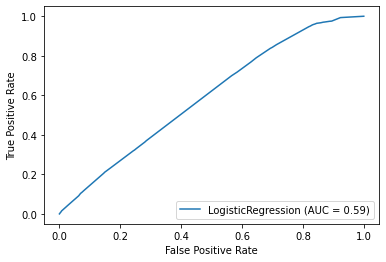

In [231]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C=0.01, max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=2020)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict_proba(X_test)[:, 1]
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred)}")
plot_roc_curve(model_lr, X_test, y_test)

#### 3.4.4 Decision Tree

Test ROC-AUC: 0.5935415975953142


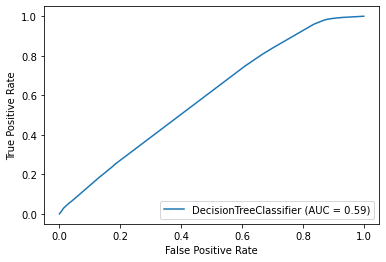

In [225]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_weight_fraction_leaf=0.001, min_samples_split=10,class_weight='balanced', random_state=2020)
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict_proba(X_test)[:, 1]
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred)}")
plot_roc_curve(model_dt, X_test, y_test)

#### 3.4.5 Random Forest

Test ROC-AUC: 0.5979566972928744


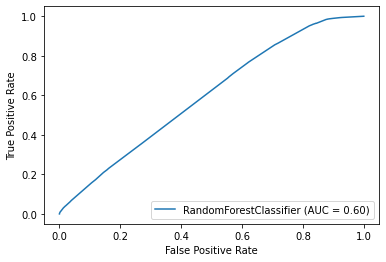

In [226]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=9, min_weight_fraction_leaf=0.000005, class_weight='balanced', random_state=2020, n_jobs=4)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict_proba(X_test)[:, 1]
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred)}")
plot_roc_curve(model_rf, X_test, y_test)

#### 3.4.6 XGBoost

Test ROC-AUC: 0.5980757153852845


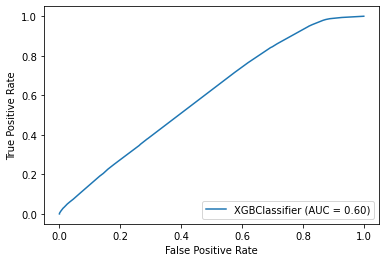

In [227]:
from xgboost import XGBClassifier

params = {
    "tree_method"       : "gpu_hist", 
    "predictor"         : "gpu_predictor", 
    "booster"           : "gbtree", 
    "objective"         : "binary:logistic", 
    "eval_metric"       : "auc", 
    "n_estimators"      : 200, 
    "max_depth"         : 6, 
    "min_child_weight"  : 15, 
    "learning_rate"     : 0.04, 
    "gamma"             : 0, 
    "subsample"         : 1.00, 
    "colsample_bytree"  : 0.60, 
    "scale_pos_weight"  : (y == 0).sum() / (y == 1).sum(), 
    "verbosity"         : 1, 
    "random_state"      : 2020, 
}

model_xgb = XGBClassifier(**params)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict_proba(X_test)[:, 1]
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred)}")
plot_roc_curve(model_xgb, X_test, y_test)

## 4. Results

In [230]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report

models = {
    'Logistic Regression' : model_lr, 
    'DecisionTree'        : model_dt, 
    'Random Forest'       : model_rf, 
    'XGBoost'             : model_xgb, 
}

df_result = pd.DataFrame(index=models.keys())
for key, val in models.items():
    print(f"{key}\n{classification_report(y_test, val.predict(X_test))}")
    df_result.loc[key, 'Precision'] = precision_score(y_test, val.predict(X_test))
    df_result.loc[key, 'Recall'] = recall_score(y_test, val.predict(X_test))
    df_result.loc[key, 'F1-score'] = f1_score(y_test, val.predict(X_test))
    df_result.loc[key, 'Accuracy'] = accuracy_score(y_test, val.predict(X_test))
    df_result.loc[key, 'ROC-AUC'] = roc_auc_score(y_test, val.predict_proba(X_test)[:, 1])
    df_result.loc[key, 'logloss'] = log_loss(y_test, val.predict_proba(X_test)[:, 1])

df_result

Logistic Regression
              precision    recall  f1-score   support

           0       0.63      0.35      0.45     27297
           1       0.55      0.79      0.65     27297

    accuracy                           0.57     54594
   macro avg       0.59      0.57      0.55     54594
weighted avg       0.59      0.57      0.55     54594

DecisionTree
              precision    recall  f1-score   support

           0       0.63      0.33      0.44     27297
           1       0.55      0.81      0.65     27297

    accuracy                           0.57     54594
   macro avg       0.59      0.57      0.54     54594
weighted avg       0.59      0.57      0.54     54594

Random Forest
              precision    recall  f1-score   support

           0       0.67      0.29      0.41     27297
           1       0.55      0.86      0.67     27297

    accuracy                           0.57     54594
   macro avg       0.61      0.57      0.54     54594
weighted avg       0.61    

,Precision,Recall,F1-score,Accuracy,ROC-AUC,logloss
Logistic Regression,0.549843,0.789464,0.648218,0.571565,0.593586,0.668194
DecisionTree,0.547677,0.809246,0.653251,0.570447,0.593542,0.663569
Random Forest,0.547307,0.855918,0.667676,0.573982,0.597957,0.663035
XGBoost,0.548157,0.839616,0.663281,0.573763,0.598076,0.661718


* Overall, the 4 models performs similarly. But the models metrics are not very good.
* The Random Forest and XGBoost perform slightly better than the Logistic Regression and Decision Tree.

## 5. Summary

* We have performed Exploratory Data Analysis, Feature Engineering and Modeling for the project. Use 6 features related to the weather, road and driver's conditions to predict the severity of an accident.
* We examined 6 metrics: Precision, Recall ,F1-score, Accuracy, ROC-AUC, logloss, on 4 models: Logistic Regression, Decision Tree, Random Forest and XGBoost, where the XGboost model performs the best, with a Precision score of 0.548157, a Recall score of 0.839616, a F1 score of 0.663281, an accuracy score of 0.573763, a ROC-AUC score of 0.598076, and a logloss score of 0.661718.
* The overall performance of all the models are not very good. For improvement, we can add more features from the original dataset to our models.

## 6. Recommendations

* To the transportation department:
    * Improve the road and light conditions for those roads where most severe accidents take place.
    * Put up signs to remind driver to stay conscious, and slow down when weather condition is not optimal.
    * Send our more police officers to monitor the speeding issue.
* To the car drivers:
    * Pay attention to the change of road and weather condition.
    * Always be conscious and focused, and obey the traffic rules.